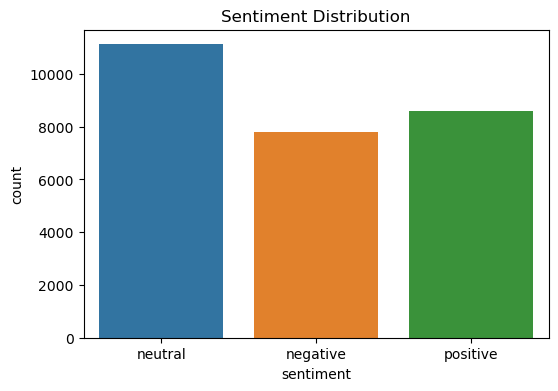

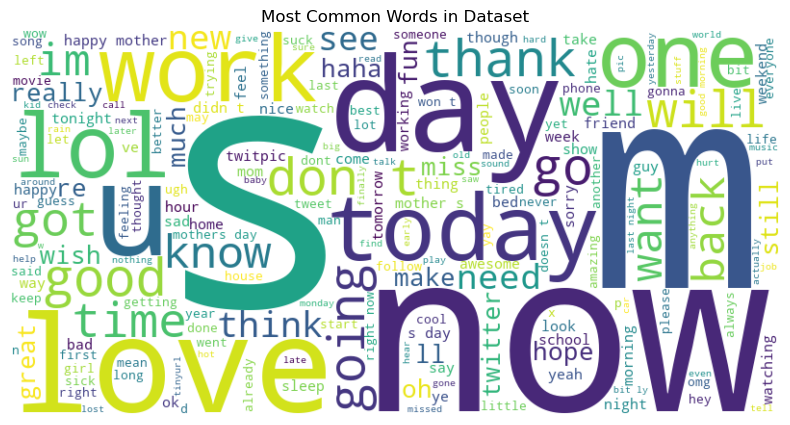

Epoch 1/10


c:\Users\Joel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


387/387 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3893 - loss: 1.0927 - val_accuracy: 0.4516 - val_loss: 1.0534 - learning_rate: 0.0010
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4424 - loss: 1.0536 - val_accuracy: 0.4985 - val_loss: 0.9826 - learning_rate: 0.0010
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5115 - loss: 0.9681 - val_accuracy: 0.5226 - val_loss: 0.9593 - learning_rate: 0.0010
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5867 - loss: 0.8764 - val_accuracy: 0.4902 - val_loss: 0.9907 - learning_rate: 0.0010
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5324 - loss: 0.9442 - val_accuracy: 0.5167 - val_loss: 0.9794 - learning_rate: 0.0010
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5993 - loss: 0.8593 - val_accuracy: 0.5761 - val_loss: 0.8709 - learning_rate: 0.0010
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7028 - loss: 0.7018 - val_

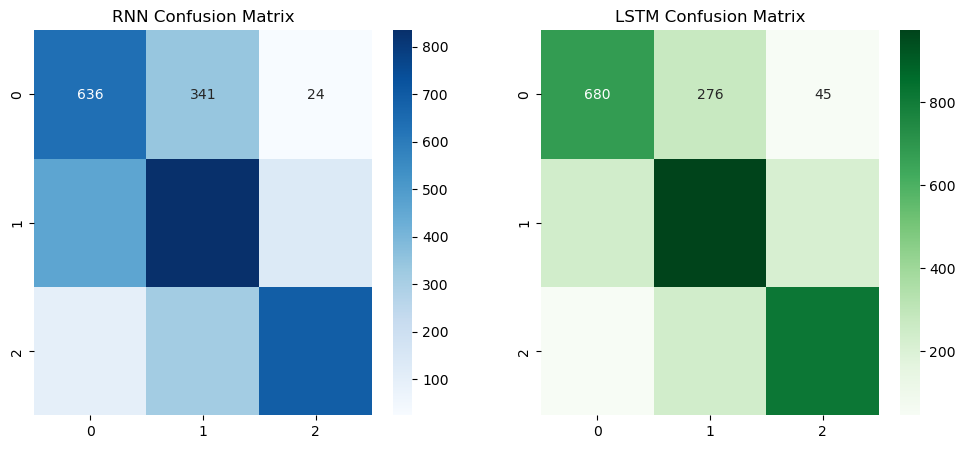

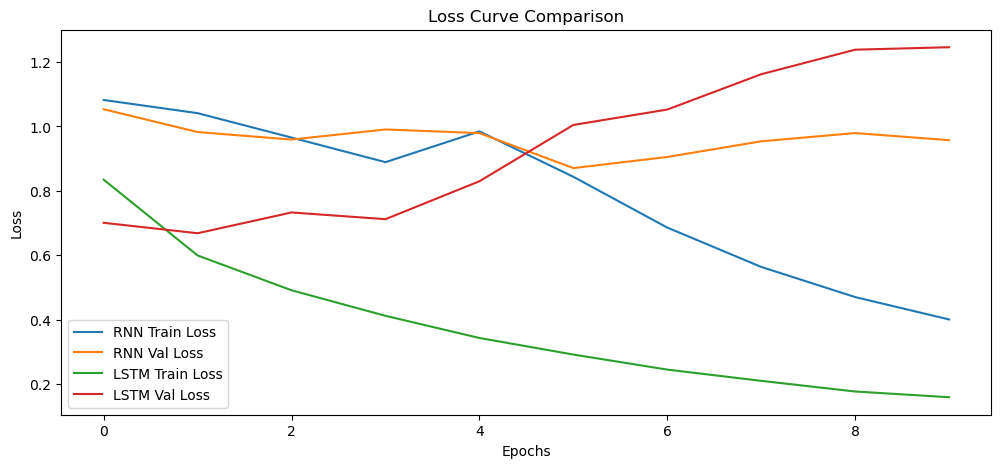

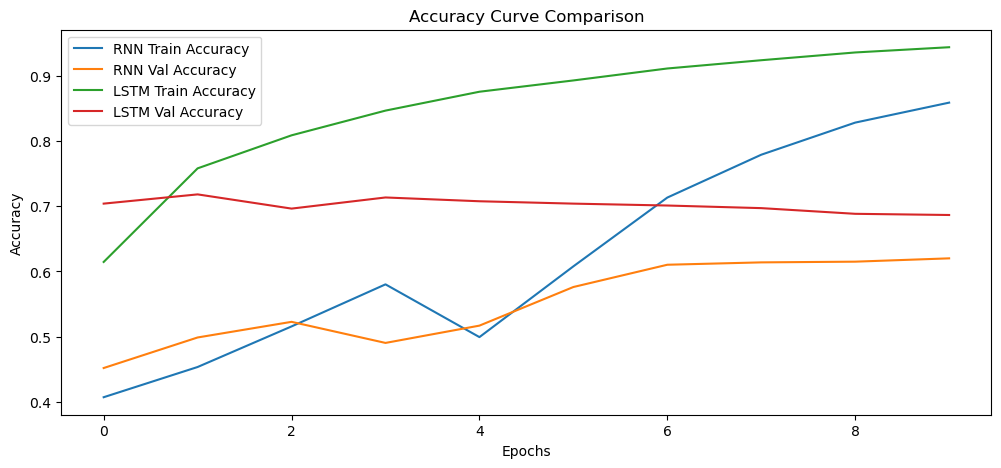

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Text: I love this! -> Predicted Sentiment (RNN): positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Text: I love this! -> Predicted Sentiment (LSTM): positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Text: This is terrible. -> Predicted Sentiment (RNN): negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Text: This is terrible. -> Predicted Sentiment (LSTM): negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Text: I am feeling neutral about this. -> Predicted Sentiment (RNN): negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Text: I am feeling neutral about this. -> Predicted Sentiment (LSTM): negative


In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load datasets
train_df = pd.read_csv("train.csv", encoding='latin-1')
test_df = pd.read_csv("test.csv", encoding='latin-1')

# Keep relevant columns and drop missing values
train_df = train_df[['text', 'sentiment']].dropna()
test_df = test_df[['text', 'sentiment']].dropna()

# Convert text to lowercase
train_df['text'] = train_df['text'].astype(str).str.lower()
test_df['text'] = test_df['text'].astype(str).str.lower()

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=train_df['sentiment'])
plt.title("Sentiment Distribution")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Dataset")
plt.show()

# Encode sentiment labels
label_encoder = LabelEncoder()
train_df['sentiment'] = label_encoder.fit_transform(train_df['sentiment'])
test_df['sentiment'] = label_encoder.transform(test_df['sentiment'])

# Tokenization
vocab_size = 10000
max_length = 50
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

# Convert text to sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['text']), maxlen=max_length, padding='post')
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['text']), maxlen=max_length, padding='post')

# Target labels
y_train = train_df['sentiment']
y_test = test_df['sentiment']

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# RNN Model
rnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    SimpleRNN(128, return_sequences=False),
    Dropout(0.4),
    Dense(3, activation='softmax')
])
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train RNN Model
history_rnn = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.4),
    Dense(3, activation='softmax')
])
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# Train LSTM Model
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

# Evaluate models
y_pred_rnn = np.argmax(rnn_model.predict(X_test), axis=1)
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)

# Classification Reports
print("RNN Model Performance:")
print(classification_report(y_test, y_pred_rnn, target_names=label_encoder.classes_))
print("LSTM Model Performance:")
print(classification_report(y_test, y_pred_lstm, target_names=label_encoder.classes_))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rnn), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("RNN Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("LSTM Confusion Matrix")
plt.show()

# Loss and Accuracy Plots
plt.figure(figsize=(12, 5))
plt.plot(history_rnn.history['loss'], label='RNN Train Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Val Loss')
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve Comparison')
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history_rnn.history['accuracy'], label='RNN Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Val Accuracy')
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve Comparison')
plt.show()

# Prediction function
def predict_sentiment(model, text):
    seq = tokenizer.texts_to_sequences([text.lower()])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(padded)
    sentiment = label_encoder.inverse_transform([np.argmax(pred)])
    return sentiment[0]

# Test Predictions
sample_texts = ["I love this!", "This is terrible.", "I am feeling neutral about this."]
for text in sample_texts:
    print(f"Text: {text} -> Predicted Sentiment (RNN): {predict_sentiment(rnn_model, text)}")
    print(f"Text: {text} -> Predicted Sentiment (LSTM): {predict_sentiment(lstm_model, text)}")